In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

In [3]:
titanic = pd.read_csv('/Users/paxton615/\
database/resource-datasets/titanic/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
x = titanic[['Pclass', 'Sex', 'Age', 'SibSp','Fare' ]]
y = titanic['Survived']

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


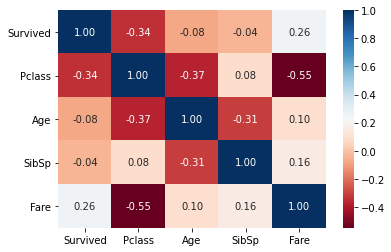

In [7]:
fig,ax = plt.subplots(figsize=(6,4))
sns.heatmap(titanic[['Survived','Pclass', 'Sex', 'Age', 'SibSp','Fare' ]].corr(),\
            cmap='RdBu', annot=True, fmt=".2f")

### fillna in age

In [8]:
x.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [9]:
x.Age.fillna(round(np.mean(x.Age),2),inplace=True)

/Users/paxton615/pycharm/projects/venv/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### dataframe to dict for DictVectorizer

In [10]:
x = x.to_dict(orient='records')  # turn each row as key-value pairs

In [11]:
# alternatively, this can also be done

# cate_feature_mask = x.dtypes==object
# cate_cols = x.columns[cate_feature_mask].tolist()
# cate_cols

### Study of DictVectorizer
The default DictVectorizer(sparse=True), but when
DictVectorizer(sparse=False), the process of transformation can be seen as following

In [12]:
dvzer = DictVectorizer(sparse=False) # default: sparse=True

x = dvzer.fit_transform(x)

#### after transformation, male and female were separated in two cols 

In [13]:
x[0:5]

array([[22.    ,  7.25  ,  3.    ,  0.    ,  1.    ,  1.    ],
       [38.    , 71.2833,  1.    ,  1.    ,  0.    ,  1.    ],
       [26.    ,  7.925 ,  3.    ,  1.    ,  0.    ,  0.    ],
       [35.    , 53.1   ,  1.    ,  1.    ,  0.    ,  1.    ],
       [35.    ,  8.05  ,  3.    ,  0.    ,  1.    ,  0.    ]])

#### .inverse_transform( ) transfer numpy.array back to dict

In [14]:
dvzer.inverse_transform(x)[0:5]

[{'Age': 22.0, 'Fare': 7.25, 'Pclass': 3.0, 'Sex=male': 1.0, 'SibSp': 1.0},
 {'Age': 38.0,
  'Fare': 71.2833,
  'Pclass': 1.0,
  'Sex=female': 1.0,
  'SibSp': 1.0},
 {'Age': 26.0, 'Fare': 7.925, 'Pclass': 3.0, 'Sex=female': 1.0},
 {'Age': 35.0, 'Fare': 53.1, 'Pclass': 1.0, 'Sex=female': 1.0, 'SibSp': 1.0},
 {'Age': 35.0, 'Fare': 8.05, 'Pclass': 3.0, 'Sex=male': 1.0}]

In [15]:
dvzer.feature_names_ # feature names in order

['Age', 'Fare', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']

In [16]:
dvzer.vocabulary_ # feature names and their indices

{'Pclass': 2, 'Sex=male': 4, 'Age': 0, 'SibSp': 5, 'Fare': 1, 'Sex=female': 3}

In [17]:
dvzer.dtype

numpy.float64

In [18]:
dvzer.get_params

<bound method BaseEstimator.get_params of DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=False)>